### Przygotowanie danych i regresja liniowa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

np.random.seed(42)

sns.set(font_scale=1.3)

### 1. Generowanie zbioru danych

In [2]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42)

print (data.shape)
print (target.shape)

(1000, 1)
(1000,)


### 2. Tworzenie zbiorów treningowych i testowych

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target,  test_size=0.25)

print (f'data shape: {data.shape}')
print (f'target shape: {target.shape}')
print (f'X_train shape: {X_train.shape}')
print (f'X_test shape: {X_test.shape}')
print (f'y_train shape: {y_train.shape}')
print (f'y_test shape: {y_test.shape}\n')


data shape: (1000, 1)
target shape: (1000,)
X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)



### 3. Wizualizacja zbiorów

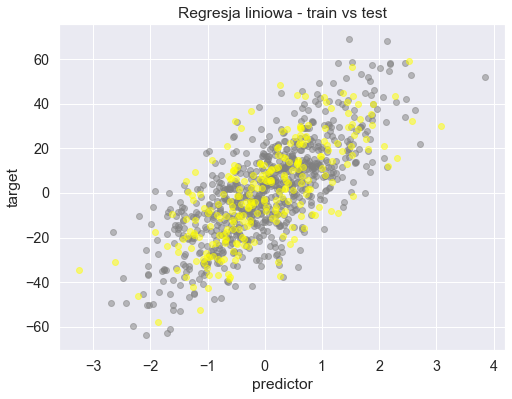

In [5]:
plt.figure (figsize=(8,6))
plt.title('Regresja liniowa - train vs test')
plt.xlabel('predictor')
plt.ylabel('target')
plt.scatter(X_train, y_train, color='grey', alpha=0.5)
plt.scatter(X_test, y_test, color='yellow', alpha=0.5);

### 4. Trenowanie modelu

In [6]:
reg = LinearRegression()
reg.fit (X_train, y_train)

LinearRegression()

In [7]:
reg.score(X_train, y_train)

0.5550440098049001

In [8]:
reg.coef_

array([16.77810981])

In [9]:
reg.intercept_

0.047775428476506565

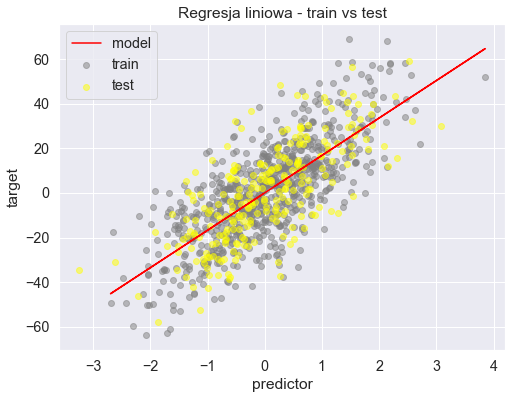

In [10]:
plt.figure (figsize=(8,6))
plt.title('Regresja liniowa - train vs test')
plt.xlabel('predictor')
plt.ylabel('target')
plt.scatter(X_train, y_train, color='grey', alpha=0.5, label='train')
plt.scatter(X_test, y_test, color='yellow', alpha=0.5, label='test')
plt.plot(X_train, reg.intercept_ + reg.coef_[0] * X_train, color='red', label='model' )
plt.legend()

#### -sprawdzenie score na modelu testowym

- zazwyczaj score modelu na danych testowych jest nieco słabszy niż na treningowych

- dla nas najważniejszy jest score dla danych, których model nie widział - czyli dane testowe

In [11]:
reg.score(X_test, y_test)

0.5108438585354155

### 5. Wizualizacja zbioru treningowego

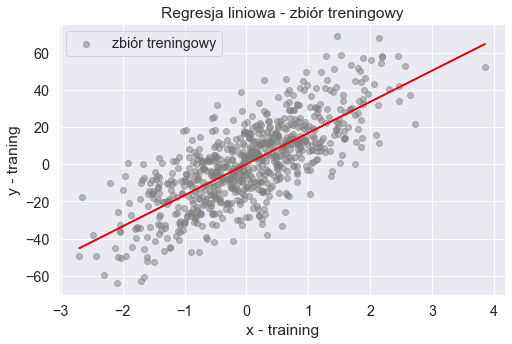

In [12]:
plt.figure(figsize=(8,5))
plt.title('Regresja liniowa - zbiór treningowy')
plt.xlabel('x - training')
plt.ylabel('y - traning')
plt.scatter(X_train, y_train, color='grey', alpha=0.5, label='zbiór treningowy')
plt.legend()
plt.plot(X_train, reg.intercept_ + reg.coef_ * X_train, color='red');

### 6. WIzualizacja zbioru testowego

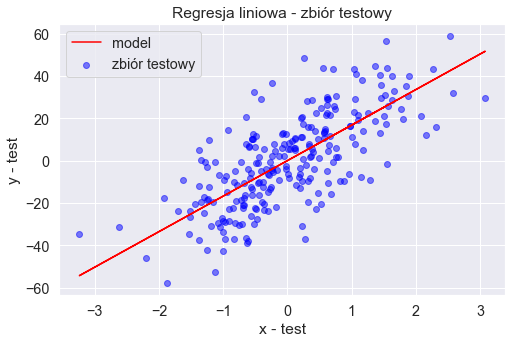

In [13]:
plt.figure(figsize=(8,5))
plt.title ('Regresja liniowa - zbiór testowy')
plt.xlabel('x - test')
plt.ylabel('y - test')
plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='zbiór testowy')
plt.plot(X_test, reg.intercept_ + reg.coef_ *  X_test, color='red', label='model')
plt.legend()
plt.show()

### 7. Predykcja na podstawie modelu

- do predykcji wrzucamy jedynie dane testowe, bez targetu (target będzie wynikiem predykcji)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
# tworzymy data frame z predykcji:

predictions = pd.DataFrame(data = {'y_true': y_test, 'y_pred': y_pred})

In [16]:
predictions

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495
...,...,...
245,-23.004471,7.501674
246,-19.329526,5.485292
247,-8.955240,-2.098440
248,12.075009,36.174107


#### - tabela błędów

In [17]:
predictions['errors'] = predictions['y_true'] - predictions.y_pred

In [18]:
predictions

,y_true,y_pred,errors
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212
...,...,...,...
245,-23.004471,7.501674,-30.506145
246,-19.329526,5.485292,-24.814818
247,-8.955240,-2.098440,-6.856800
248,12.075009,36.174107,-24.099099


In [30]:
predictions['errors'].mean()

0.06485653755743294

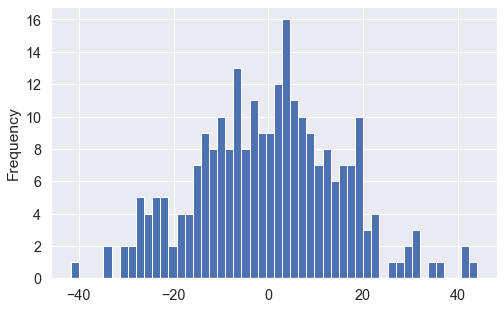

In [20]:
_ = predictions['errors'].plot(kind='hist', bins=50, figsize=(8,5))

In [21]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_true  250 non-null    float64
 1   y_pred  250 non-null    float64
 2   errors  250 non-null    float64
dtypes: float64(3)
memory usage: 6.0 KB


<AxesSubplot:>

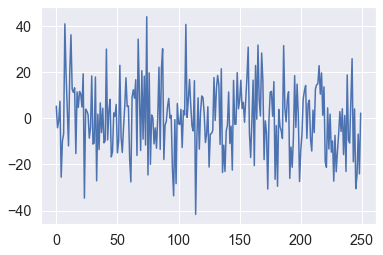

In [28]:
predictions['errors'].plot()